# 自定义节点图标

同济子豪兄 2022-7-6

参考文档：https://networkx.org/documentation/stable/auto_examples/drawing/plot_custom_node_icons.html#sphx-glr-auto-examples-drawing-plot-custom-node-icons-py

## 导入工具包

In [1]:
# 图数据挖掘
import networkx as nx

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
import PIL

## 自定义图标

In [3]:
# 图标下载网站
# www.materialui.co
# https://www.flaticon.com/
# 服务器：https://www.flaticon.com/free-icon/database-storage_2906274?term=server&page=1&position=8&page=1&position=8&related_id=2906274&origin=search
# 笔记本电脑：https://www.flaticon.com/premium-icon/laptop_3020826?term=laptop&page=1&position=13&page=1&position=13&related_id=3020826&origin=search
# 路由器：https://www.flaticon.com/premium-icon/wifi_1183657?term=router&page=1&position=3&page=1&position=3&related_id=1183657&origin=search

icons = {
    'router': 'database-storage.png',
    'switch': 'wifi.png',
    'PC': 'laptop.png',
}

# 载入图像
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}


In [4]:
images

{'router': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512>,
 'switch': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512>,
 'PC': <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=512x512>}

## 创建图

In [5]:
# 创建空图
G = nx.Graph()

# 创建节点
G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 4):
        G.add_node("PC_" + str(i) + "_" + str(j), image=images["PC"])

# 创建连接
G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))

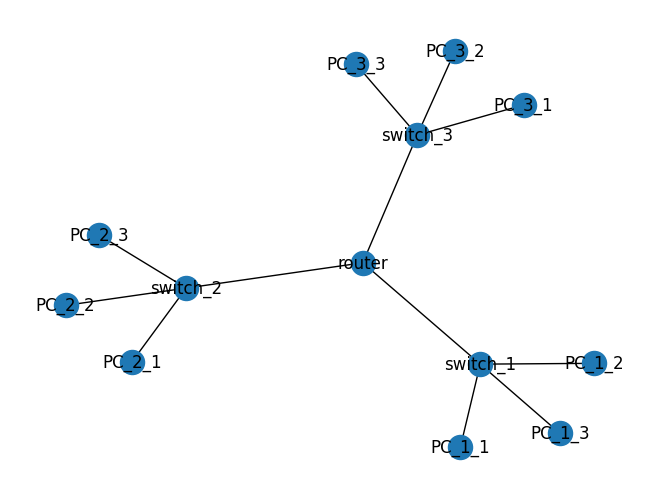

In [6]:
nx.draw(G, with_labels=True)

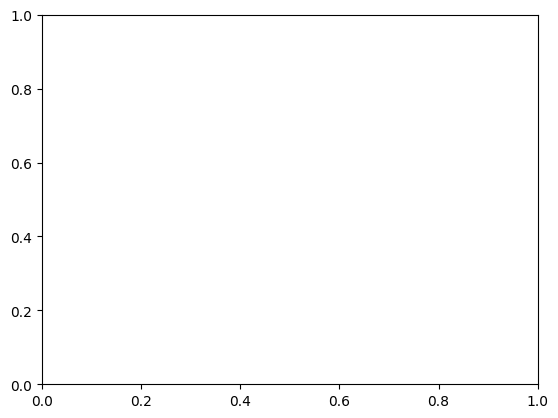

In [7]:
fig, ax = plt.subplots()

In [8]:
# 图片尺寸（相对于 X 轴）
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.04
icon_center = icon_size / 2.0

## 可视化自定义节点图标（如果第一次节点图标尺寸偏小，可再次运行本代码块）

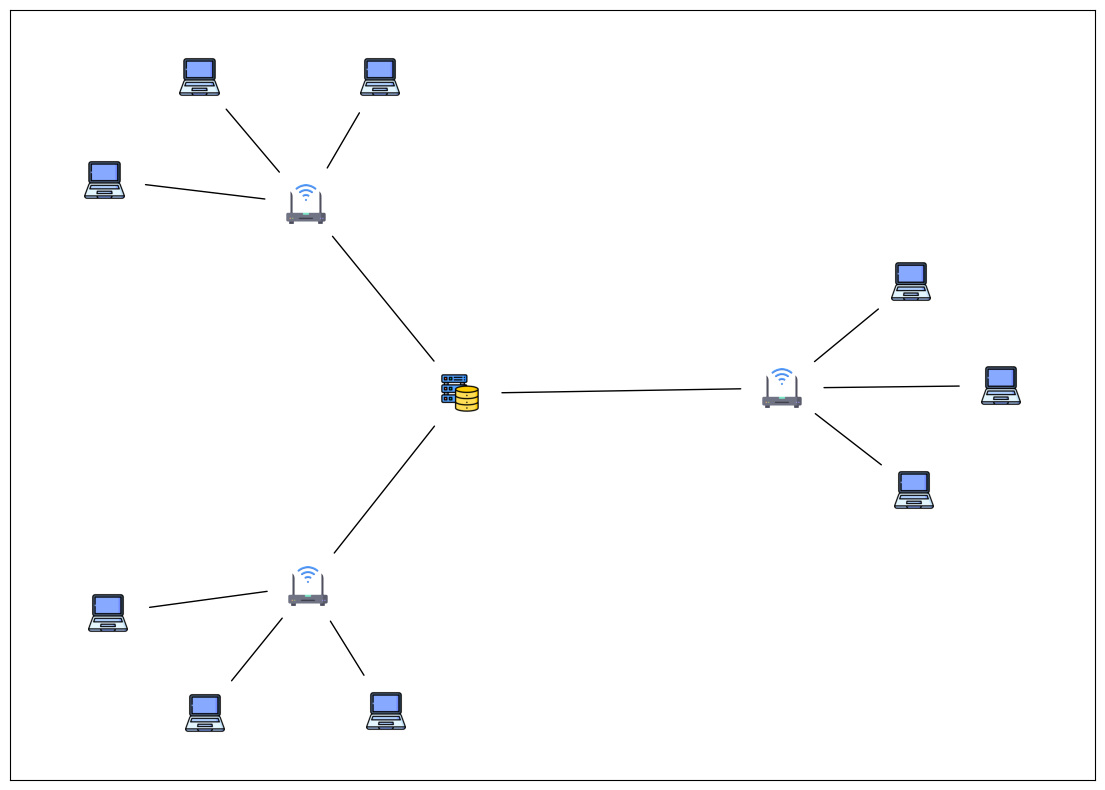

In [9]:
pos = nx.spring_layout(G, seed=1)
fig, ax = plt.subplots(figsize=(14,10))

# 绘制连接
# min_source_margin 和 min_target_margin 调节连接端点到节点的距离
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=30,
    min_target_margin=30,
)

# 给每个节点添加各自的图片
for n in G.nodes:
    xf, yf = ax.transData.transform(pos[n]) # data坐标 转 display坐标
    xa, ya = fig.transFigure.inverted().transform((xf, yf)) # display坐标 转 figure坐标
    
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")

plt.show()